In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [4]:
y = df.iloc[:,1:2]
y = pd.get_dummies(y, columns=['diagnosis']) # B, M
y = y.astype(float)

In [5]:
y = y.iloc[:,:].values

In [6]:
y.shape

(569, 2)

In [7]:
X = df.iloc[:,2:32].values

In [8]:
X.shape

(569, 30)

In [9]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.33, random_state=42)

In [10]:
X_train_tensor = torch.FloatTensor(X_train)
X_val_tensor = torch.FloatTensor(X_val)
X_test_tensor = torch.FloatTensor(X_test)

In [11]:
y_train_tensor = torch.FloatTensor(y_train)
y_val_tensor = torch.FloatTensor(y_val)
y_test_tensor = torch.FloatTensor(y_test)

In [12]:
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

In [28]:
class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, 64)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(64, 48)
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(48, 64)
        self.relu4 = nn.ReLU()
        self.fc5 = nn.Linear(64, 24)
        self.relu5 = nn.ReLU()
        self.fc6 = nn.Linear(24, 16)
        self.relu6 = nn.ReLU()
        self.fc7 = nn.Linear(16, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        x = self.relu3(x)
        x = self.fc4(x)
        x = self.relu4(x)
        x = self.fc5(x)
        x = self.relu5(x)
        x = self.fc6(x)
        x = self.relu6(x)
        x = self.fc7(x)
        x = self.sigmoid(x)

        return x

In [14]:
def train_model(model, train_loader, criterion, optimizer, device):
    model.train()
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

def evaluate_model(model, loader, criterion, device):
    model.eval()
    total_loss = 0.0
    with torch.no_grad():
        for inputs, labels in loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            total_loss += criterion(outputs, labels).item()
    return total_loss / len(loader)

In [ ]:
input_size = X_train.shape[1]
output_size = 2

Epoch 1/100, Training Loss: 0.6555, Validation Loss: 0.6392
Epoch 2/100, Training Loss: 0.6462, Validation Loss: 0.6373
Epoch 3/100, Training Loss: 0.6296, Validation Loss: 0.6043
Epoch 4/100, Training Loss: 0.6687, Validation Loss: 0.6780
Epoch 5/100, Training Loss: 0.5827, Validation Loss: 0.5498
Epoch 6/100, Training Loss: 0.7132, Validation Loss: 0.6541
Epoch 7/100, Training Loss: 0.5583, Validation Loss: 0.5211
Epoch 8/100, Training Loss: 0.5369, Validation Loss: 0.4946
Epoch 9/100, Training Loss: 0.6364, Validation Loss: 0.6110
Epoch 10/100, Training Loss: 0.5566, Validation Loss: 0.5203
Epoch 11/100, Training Loss: 0.4979, Validation Loss: 0.4483
Epoch 12/100, Training Loss: 0.5872, Validation Loss: 0.5524
Epoch 13/100, Training Loss: 0.6023, Validation Loss: 0.5552
Epoch 14/100, Training Loss: 0.6779, Validation Loss: 0.6125
Epoch 15/100, Training Loss: 0.5874, Validation Loss: 0.5358
Epoch 16/100, Training Loss: 0.5365, Validation Loss: 0.4990
Epoch 17/100, Training Loss: 0.63

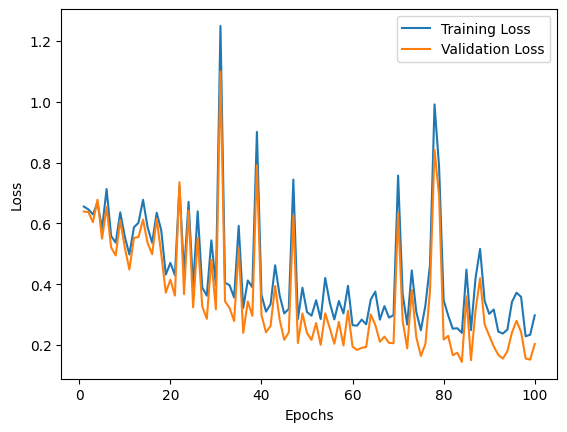

Test Loss: 0.1347


In [29]:
model = SimpleNN(input_size, hidden_size=64, output_size=output_size)
optimizer = optim.SGD(model.parameters(), lr=0.01)
criterion = nn.BCELoss()

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

num_epochs = 100
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

train_losses = []
val_losses = []

for epoch in range(num_epochs):
    train_model(model, train_loader, criterion, optimizer, device)
    train_loss = evaluate_model(model, train_loader, criterion, device)
    val_loss = evaluate_model(model, val_loader, criterion, device)

    print(f'Epoch {epoch + 1}/{num_epochs}, Training Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}')

    train_losses.append(train_loss)
    val_losses.append(val_loss)

plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)
test_loss = evaluate_model(model, test_loader, criterion, device)
print(f'Test Loss: {test_loss:.4f}')

In [25]:
class SimpleNN2(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleNN2, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.activation1 = nn.Sigmoid()
        self.fc2 = nn.Linear(hidden_size, 32)
        self.activation2 = nn.Sigmoid()
        self.fc3 = nn.Linear(32, 48)
        self.activation3 = nn.Sigmoid()
        self.fc4 = nn.Linear(48, output_size)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.activation1(x)
        x = self.fc2(x)
        x = self.activation2(x)
        x = self.fc3(x)
        x = self.activation3(x)
        x = self.fc4(x)
        x = self.softmax(x)
        return x

Epoch 1/100, Training Loss: 0.6672, Validation Loss: 0.6778
Epoch 2/100, Training Loss: 0.6592, Validation Loss: 0.6784
Epoch 3/100, Training Loss: 0.6625, Validation Loss: 0.6775
Epoch 4/100, Training Loss: 0.6570, Validation Loss: 0.6775
Epoch 5/100, Training Loss: 0.6579, Validation Loss: 0.6788
Epoch 6/100, Training Loss: 0.6577, Validation Loss: 0.6791
Epoch 7/100, Training Loss: 0.6577, Validation Loss: 0.6786
Epoch 8/100, Training Loss: 0.6559, Validation Loss: 0.6791
Epoch 9/100, Training Loss: 0.6556, Validation Loss: 0.6813
Epoch 10/100, Training Loss: 0.6668, Validation Loss: 0.6840
Epoch 11/100, Training Loss: 0.6557, Validation Loss: 0.6838
Epoch 12/100, Training Loss: 0.6590, Validation Loss: 0.6820
Epoch 13/100, Training Loss: 0.6607, Validation Loss: 0.6821
Epoch 14/100, Training Loss: 0.6570, Validation Loss: 0.6805
Epoch 15/100, Training Loss: 0.6620, Validation Loss: 0.6807
Epoch 16/100, Training Loss: 0.6601, Validation Loss: 0.6802
Epoch 17/100, Training Loss: 0.65

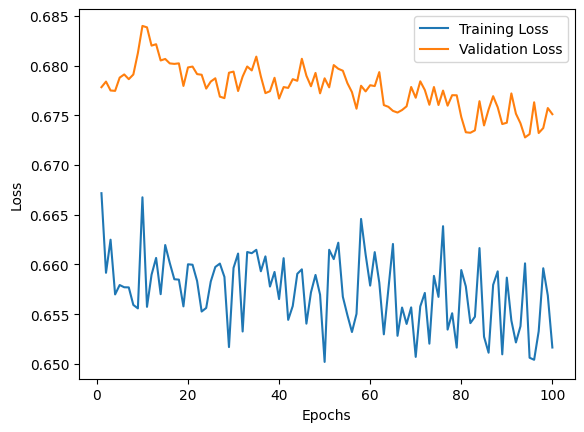

Test Loss: 0.6038


In [27]:
model = SimpleNN2(input_size, hidden_size=64, output_size=output_size)
optimizer = optim.SGD(model.parameters(), lr=0.01)
criterion = nn.BCELoss()

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

num_epochs = 10
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

train_losses = []
val_losses = []

for epoch in range(num_epochs):
    train_model(model, train_loader, criterion, optimizer, device)
    train_loss = evaluate_model(model, train_loader, criterion, device)
    val_loss = evaluate_model(model, val_loader, criterion, device)

    print(f'Epoch {epoch + 1}/{num_epochs}, Training Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}')

    train_losses.append(train_loss)
    val_losses.append(val_loss)

plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)
test_loss = evaluate_model(model, test_loader, criterion, device)
print(f'Test Loss: {test_loss:.4f}')